# Computer vision using Convoluational neural network

`Convolutional Neural Network` : A type of artifical neural network particularly well suited for analyzing visual image data and video.

* designed to learn hierarchical feature representations from input data making them effective for tasks such as image classification, object detection and image segmentation.
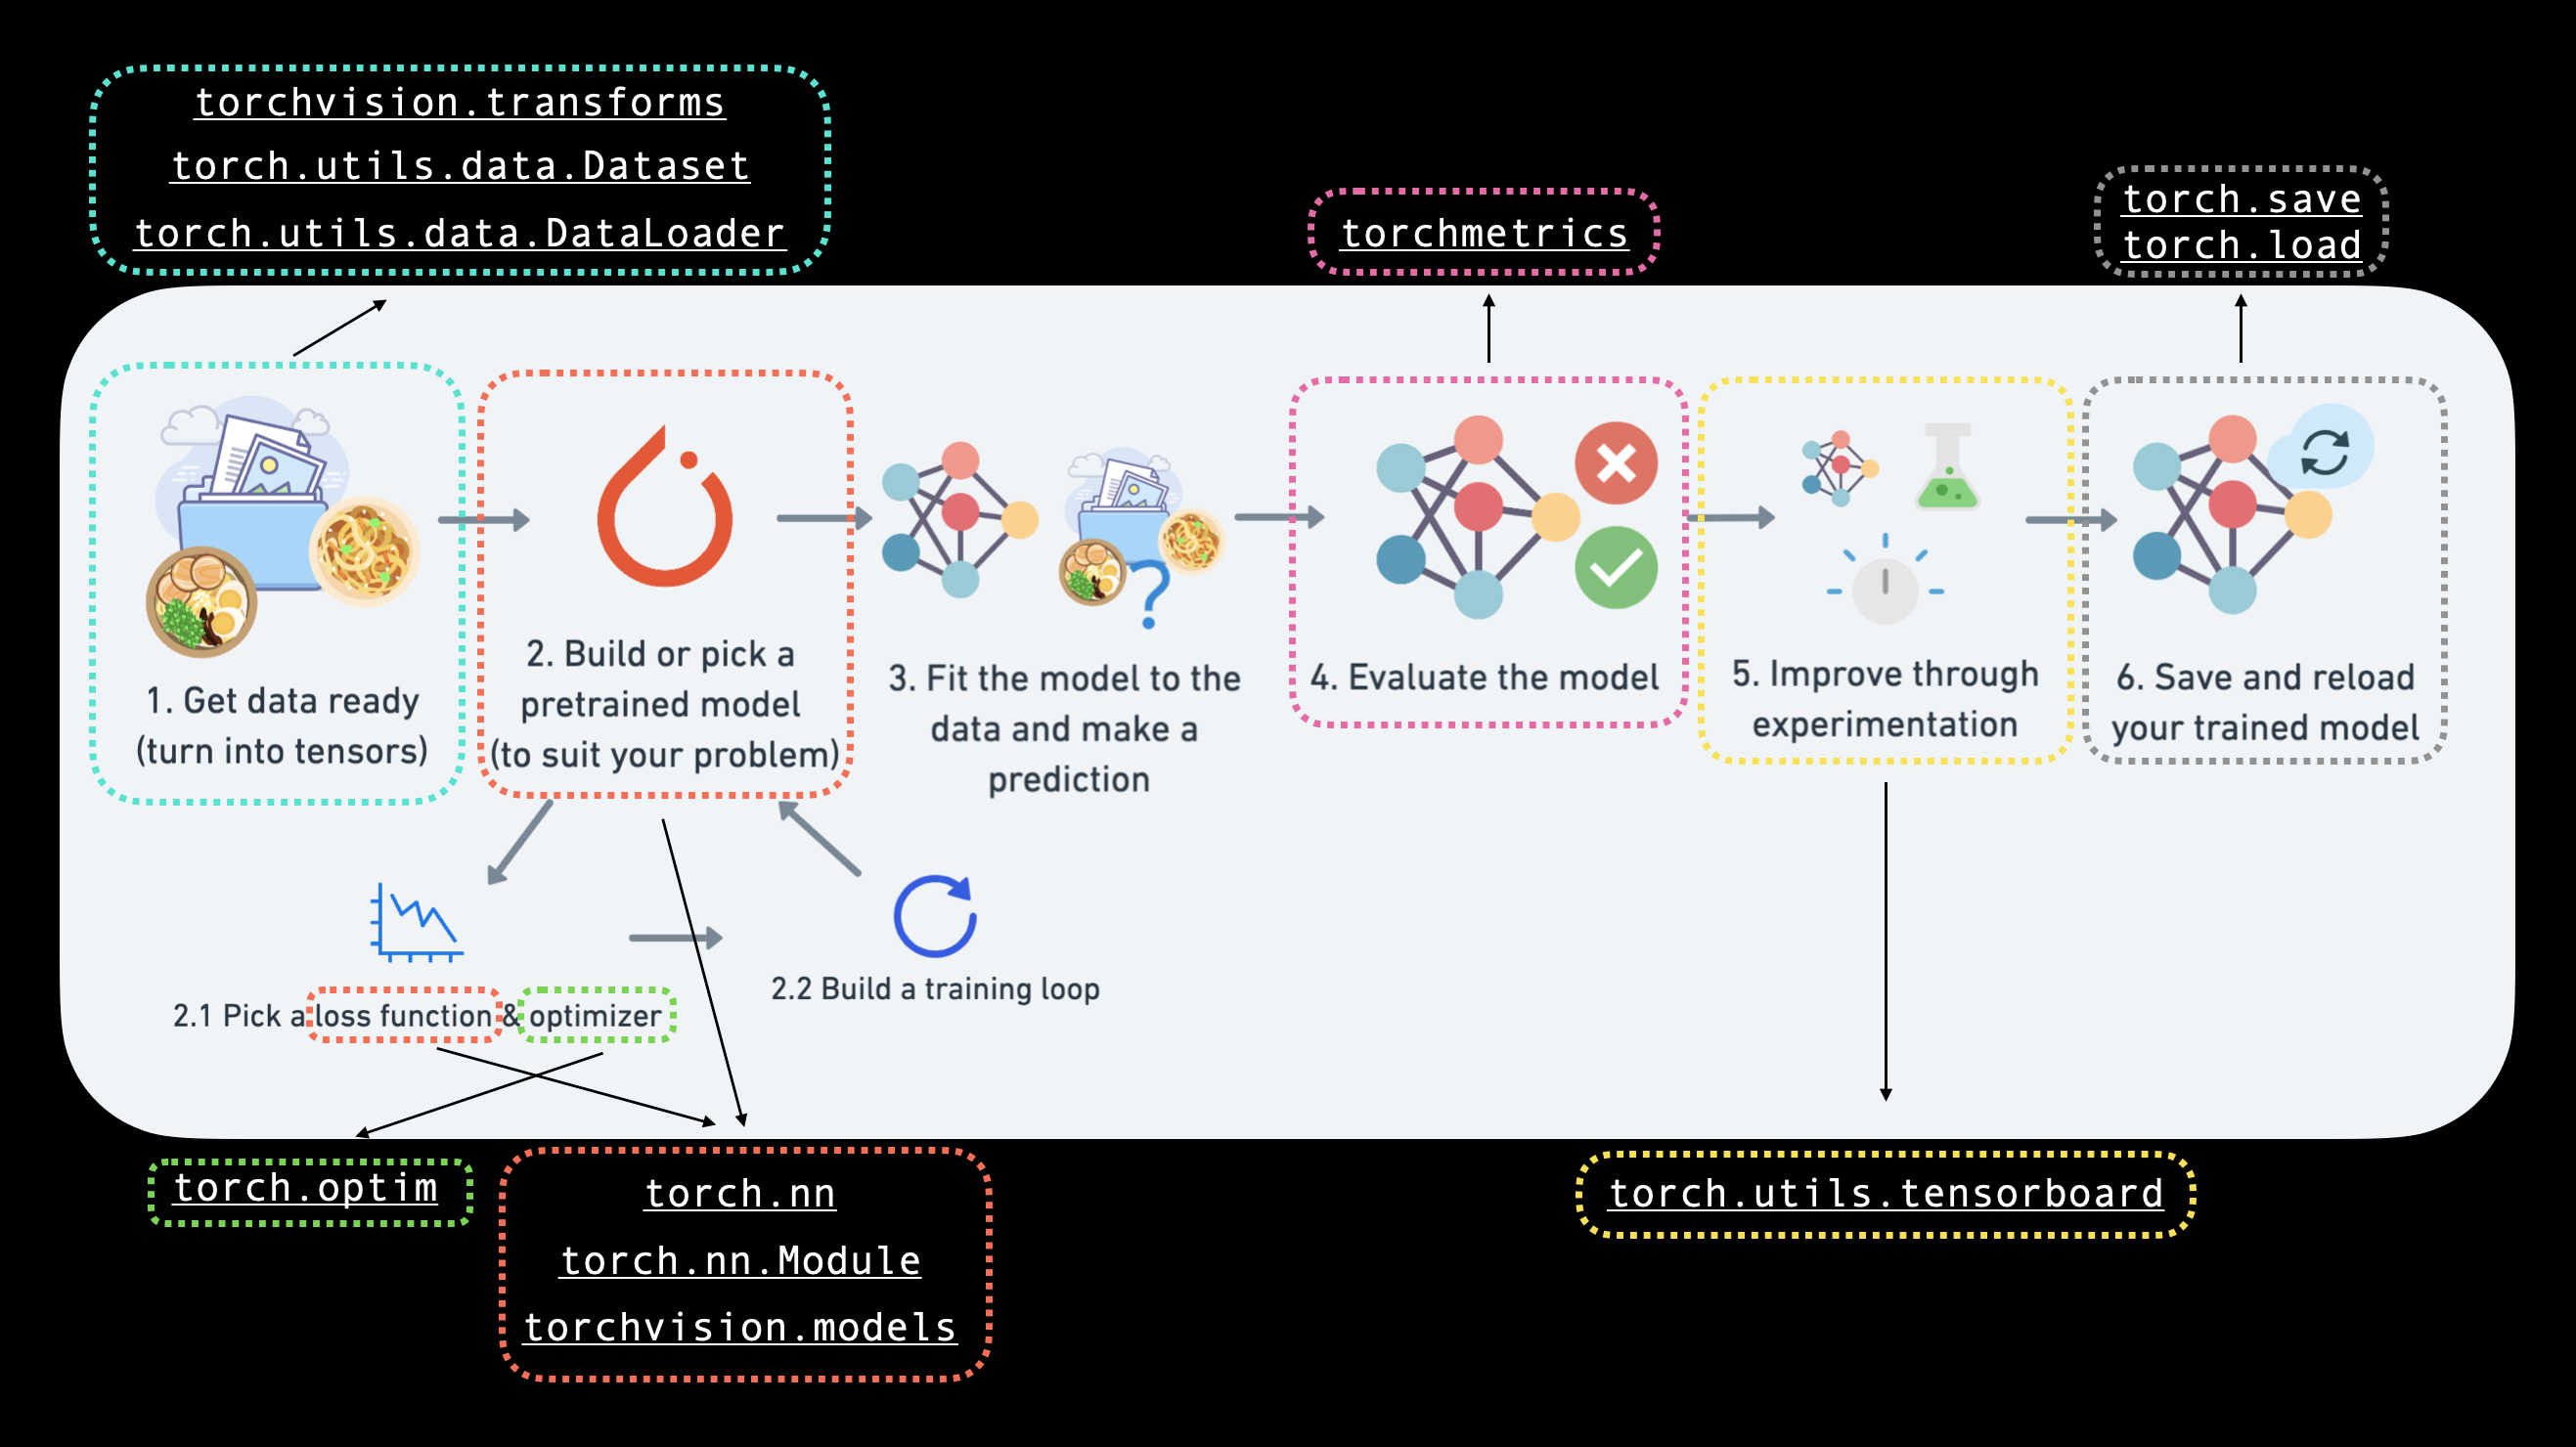

# Architectre of CNN

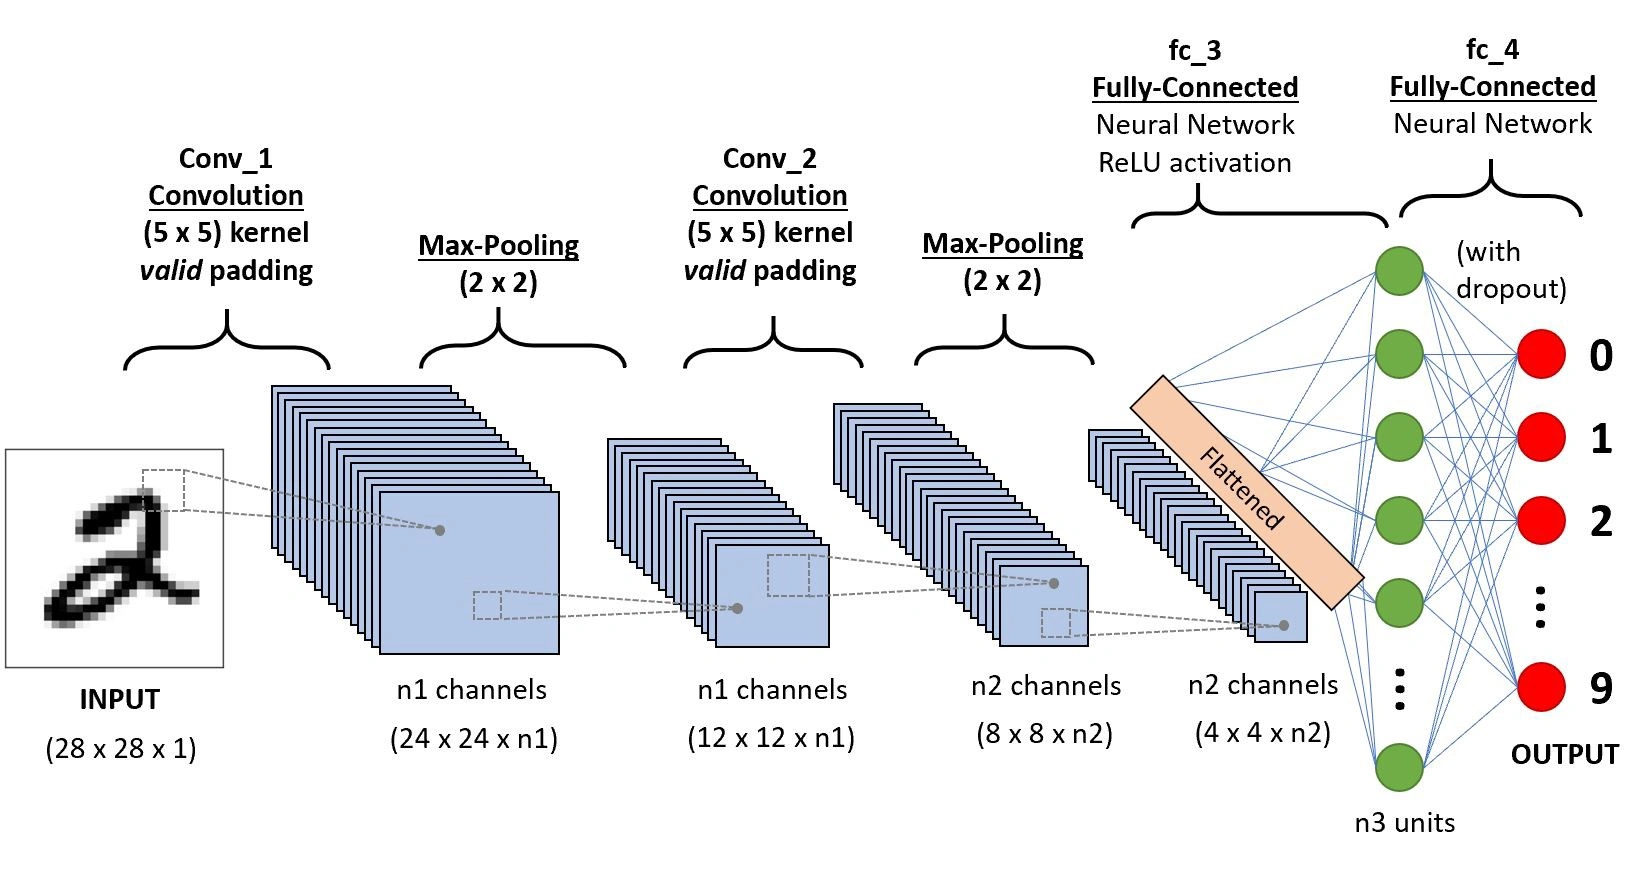


# computer vision libraries in pytorch

* [`torchvision`] - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here   
* `torchvision.models` - get pretrained computer vision models that you can leverage
* `torchvision.transforms` - functions for manipulating vision data suitable for ml model
* `torch.utils.data.Dataset` - base dataset class for  pytorch
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor # converts PIL image or numpy.ndarray to tensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [3]:
# getting a dataset

train_data = datasets.FashionMNIST(
    root="data", # where to download data
    train=True, # do we want training data set
    download=True, # do we want to download
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data
    train=False, # do we want training data set
    download=True, # do we want to download
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 339kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.7MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]

image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names=train_data.classes
class_names
print(train_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# check the shape
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

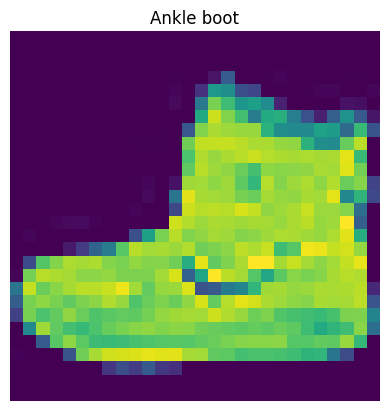

In [9]:
# visualizing the data
import matplotlib.pyplot as plt
image , label = train_data[0]

image.shape
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)


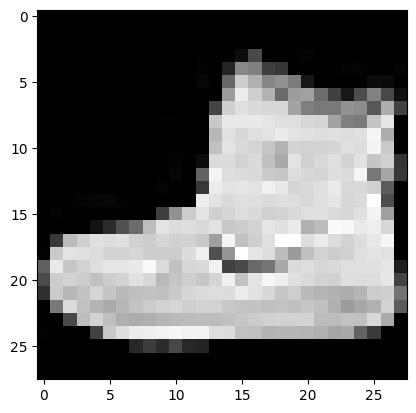

In [10]:
plt.imshow(image.squeeze(),cmap="grey")

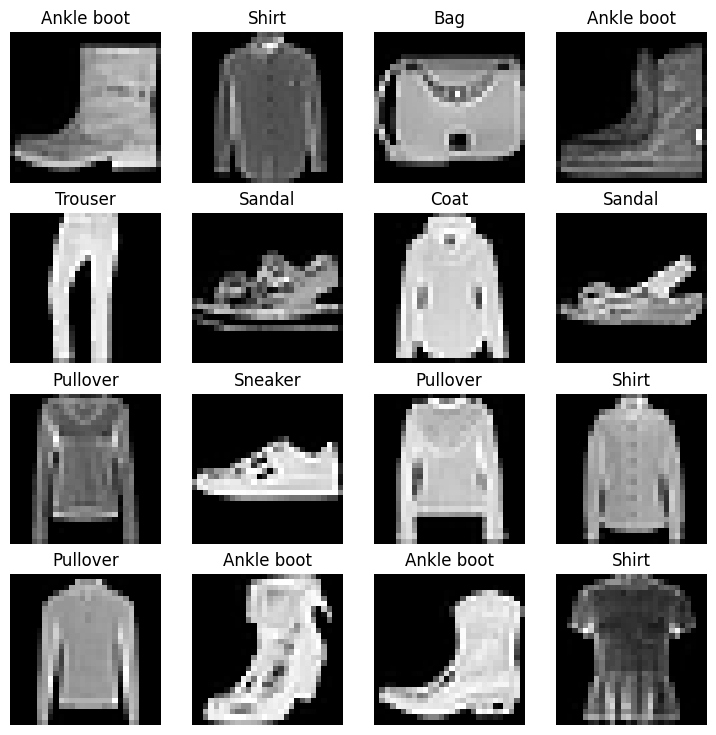

In [11]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols =4,4

for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="grey")
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# prepare dataloader

our data is in the form of Pytorch datasets
Dataloader converts to datasets into a python iterable

we want to turn data into batches of data(or min batches)

* we break it into 32 images at a time (batch size of 32)
* gives more chance to neural network to update the gradients at each epochs
* more computational efficient for processing batch data



In [13]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d0ccec873d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0ccb9d97d0>)

In [14]:
len(train_dataloader) , train_dataloader.batch_size

(1875, 32)

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
len(test_dataloader) , test_dataloader.batch_size

(313, 32)

image shape torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

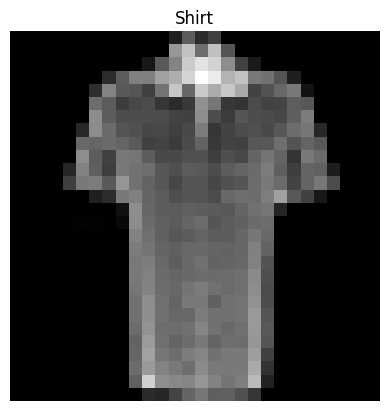

In [17]:
# sample
torch.manual_seed(42)
random_indx =torch.randint(0,len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_indx], train_labels_batch[random_indx]

plt.imshow(img.squeeze(),cmap="grey")
print(f"image shape {img.shape}")
plt.title(class_names[label])
plt.axis(False)

# Model : build a base line model

a simple model will try and improve upon with experiments

In [18]:
# creating a flatten layer
# flatten layer : Converts a multidimensional data into a one dimensional array

flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape
# flatten the sample
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [19]:
28 * 28

784

In [20]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [21]:
from torch import nn

class FashionMNISTModel(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()

    self.layer_stack =nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

# model input parameters
model_0 = FashionMNISTModel(
    input_shape=28*28,
    hidden_units=10,  # how many units in hidden layer
    output_shape=len(class_names)
)

model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dum_x = torch.rand([1,1,28,28])

model_0(dum_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

# setup loss optimizer and evaluation metrices

* loss function - `nn.CrossEntropyLoss`
* optimizer - our optimizer stochastic gradient
* evaluation metrics - accuaracy

In [25]:
import requests
from pathlib import Path

# helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")

else:
  print("Downloading the helper_functions.py file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [26]:
from helper_functions import accuracy_fn

# setup loss
loss_fn = nn.CrossEntropyLoss()

# setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [27]:
# creating function to time our experiments
from timeit import default_timer as timer

def print_train_time(start:float,end:float,device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [28]:
start_time = timer()
#some code...
end_time = timer()
print_train_time(start=start_time,end=end_time,device=None)

Train time on None: 0.000 seconds


5.9389000000464875e-05

# creating a training loop and training a model on batches of data

1. loop through epochs
2. loop through training batches , perform training steps, calculate the train loss
3. loop through testing batches, calculate the test loss
4. print out
5. time it


In [29]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and start timer
torch.manual_seed(42)

train_time_start =timer()

epochs =3

# create a training loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---")

  train_loss=0

  #add loop to loop through the training batches
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()
    # forward pass
    y_pred =model_0(x)

    #loss
    loss = loss_fn(y_pred,y)
    train_loss +=loss

    # optimize
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()


    if batch % 400 ==0:
      print(f"looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")

  # divide total train loss by length of train dataloader

  train_loss /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f}")

  # testing
  test_loss, test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred = model_0(x_test)
      test_loss += loss_fn(test_pred,y_test)


      #calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

     # calculate test loss average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Test loss: {test_loss:.5f}")
  print(f"Test accuracy: {test_acc:.5f}")

# calculate training time
train_time_end = timer()

total_train_time = print_train_time(start=train_time_start,end=train_time_end,device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
Train loss: 0.59039
Test loss: 0.50954
Test accuracy: 82.03874
Epoch:1
---
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
Train loss: 0.47633
Test loss: 0.47989
Test accuracy: 83.19688
Epoch:2
---
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
Train loss: 0.45503
Test loss: 0.47664
Test accuracy: 83.42652
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        

In [30]:
# make predictions get results
from tqdm.auto import tqdm

torch.manual_seed(42)
def eval_model(model:nn.Module,data_loader:DataLoader,loss_fn:nn.Module,accuracy_fn):
  '''
  return a dictionary containing the results of model predicting on data_loader
  '''
  loss,acc =0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      y_pred = model(x)

      # calculate loss and accuarcy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}

# calculate results on test data sets
model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [31]:
# setup device agnostic code

if torch.cuda.is_available():
  device="cuda"
else:
    device="cpu"


In [32]:
device

'cpu'

In [33]:
# Building a better model with non_linearity
from torch import nn

class FashionMNISTModel1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()

    self.layer_stack =nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)


In [34]:
torch.manual_seed(42)

model_1 = FashionMNISTModel1(
    input_shape=28*28,
    hidden_units=10,  # how many units in hidden layer
    output_shape=len(class_names)
)
model_1.parameters()

<generator object Module.parameters at 0x7d0ccb170200>

In [35]:
import requests
from pathlib import Path
# helps to download files from pytorch repo
# download helper functions from pytorch repo

if Path("helper_functions.py").is_file():
    print("helper functions already downloaded")
else:
    print("downloading helper functions")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


from helper_functions import  plot_predictions, plot_decision_boundary

helper functions already downloaded


In [36]:
import torch
from torch import nn
from helper_functions import accuracy_fn
# create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is


#creating an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01) # tries to update our models paramereter to reduce the loss


In [37]:
# creating a function training and testing loop
def train_step(model : torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                optimizer: torch.optim.Optimizer,
                loss_fn: torch.nn.Module,
                accuracy_fn
                ):

  "performing training with model trying to learn data_loader"
  model.train()
  train_loss,train_acc=0,0
  #add loop to loop through the training batches
  for batch, (x,y) in enumerate(data_loader):
    # forward pass
    y_pred =model(x)

    #loss
    loss = loss_fn(y_pred,y)
    train_loss +=loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits -> predictions labels

    # optimize
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # divide total train loss and accuracy by length of train dataloader

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f"Train loss: {train_loss:.3f} | Train accuracy: {train_acc:.3f}%")

  return train_loss,train_acc


In [38]:
train_step(model_1,train_dataloader,loss_fn=loss_fn,optimizer,accuracy_fn=accuracy_fn)

SyntaxError: positional argument follows keyword argument (ipython-input-38-2037446001.py, line 1)

In [39]:
# creating a testing function

def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss=torch.nn.Module,
              accuracy_fn=accuracy_fn):
  "performing a testing loop"

  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      test_pred = model(x) # outputs raw logits

      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # go from logits -> predictions probabilities -> prediction labels

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.3f} | Test accuracy: {test_acc:.3f}%")

  return test_loss,test_acc


In [40]:
test_step(model_1,test_dataloader,optimizer,accuracy_fn)

Test loss: 2.302 | Test accuracy: 10.753%


(tensor(2.3021), 10.75279552715655)

In [41]:
# make predictions
# torch.manual_seed(42)

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x[22].unsqueeze(dim=0))

y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_label = torch.argmax(y_pred_probs,dim=1)

print(f"Predicted label: {y_pred_label}")
print(f"Actual label: {y[0]}")


Predicted label: tensor([5])
Actual label: 5


In [42]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

# set seed and start timer
torch.manual_seed(42)

start_timer = timer()
epochs =3

for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n-------")
  model_1.train()
  train_step(model_1,train_dataloader,optimizer,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  test_step(model_1,test_dataloader,loss=loss_fn,accuracy_fn=accuracy_fn)

end_timer = timer()

total_time = end_timer - start_timer
print(f"Total training time: {total_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-------
Train loss: 1.422 | Train accuracy: 54.287%
Test loss: 1.122 | Test accuracy: 62.151%
epoch:1
-------
Train loss: 1.034 | Train accuracy: 64.612%
Test loss: 1.000 | Test accuracy: 64.477%
epoch:2
-------
Train loss: 0.960 | Train accuracy: 66.052%
Test loss: 0.963 | Test accuracy: 65.405%
Total training time: 36.402 seconds


In [43]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [46]:
model_1_results

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.9633837938308716,
 'model_acc': 65.40535143769968}

In [45]:
model_1_results = eval_model(model_1,test_dataloader,loss_fn,accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [48]:
eval_model(model_0,train_dataloader,loss_fn,accuracy_fn)

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.4302612841129303,
 'model_acc': 84.94166666666666}

In [47]:
model_1

FashionMNISTModel1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [49]:
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# Convolutional Neural Network

CNN : a type of neural network in deeplearning algorithm particularly well suited for analyzing images and videos

* widely used in computer vision tasks such as image recognition object detection and image segmentation


# Architectre of CNN

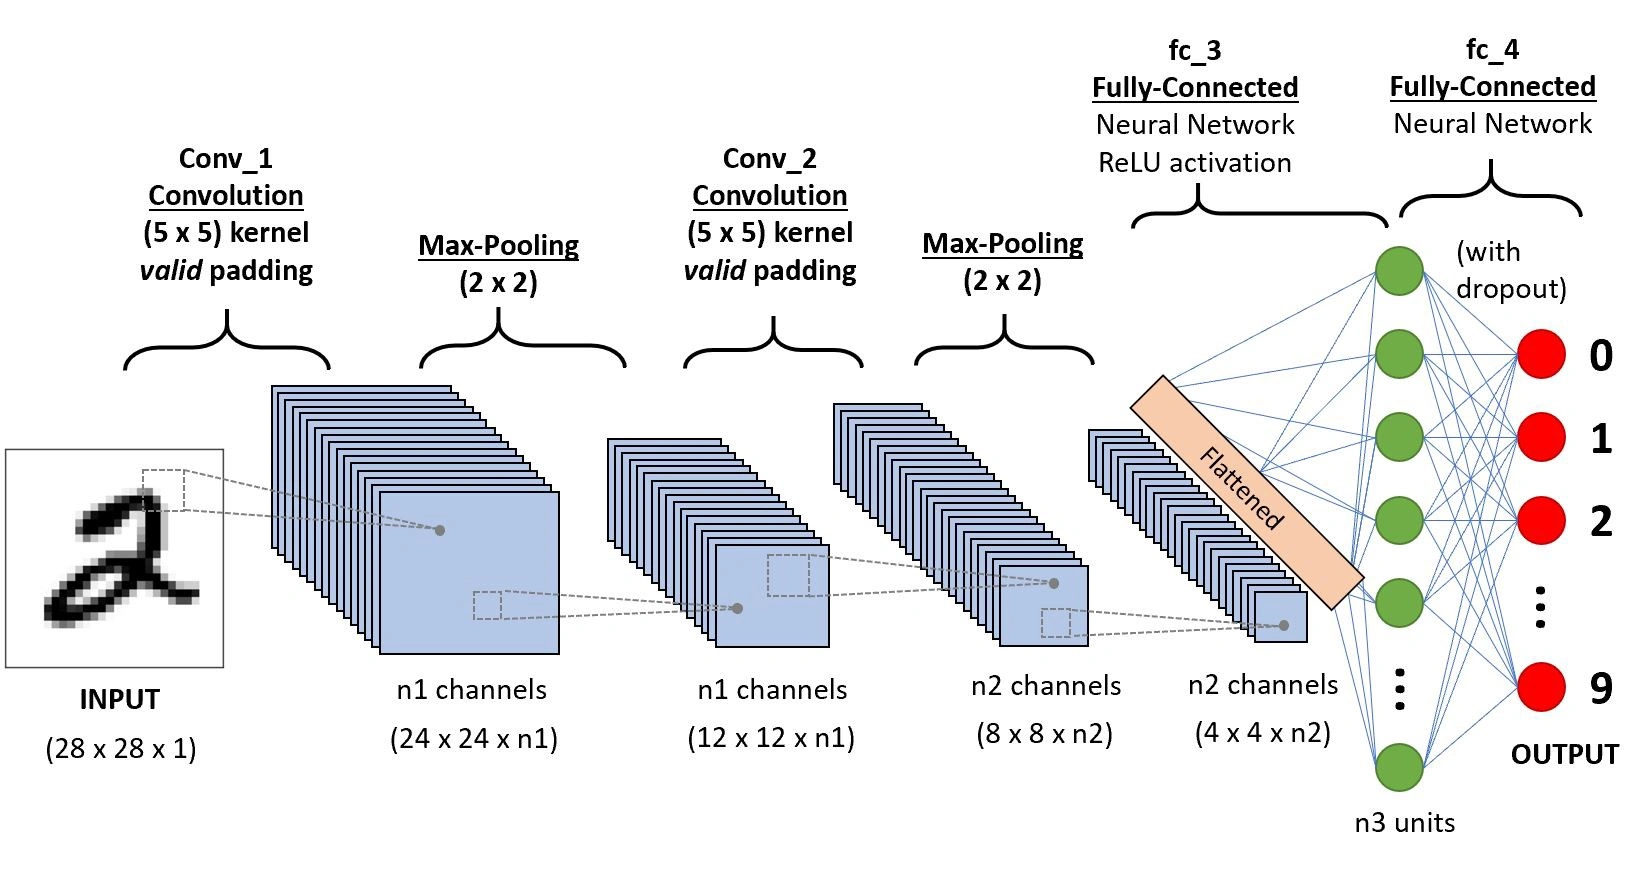


In [81]:
# Building a CNN Architecture
import torch
import torch.nn as nn


# what are convolutional layers
'''
The convolution layer extracts key features from the input feature map through multiple convolution operations, and generates an output feature map
it is a fully connected layer where each input neuro is connected to eahoutput neuro in the next layer
'''


class FashionmnistmodelV7(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          # create a conv layer
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1), # hyper parameters : values we can set ourselves
          #nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
         # nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,stride=2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3,  padding=1),
         # nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #  nn.ReLU(),
          nn.MaxPool2d(2)
      )

      self.classifier_layer = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7, # trick to calculate these
                    out_features=output_shape)
      )

    def forward(self, x):
        x = self.conv_block_1(x)
       # print(f"output shape of conv bloack 1: {x.shape}")
        x = self.conv_block_2(x)
       # print(f"output shape of conv bloack 1: {x.shape}")
        x = self.classifier_layer(x)
       # print(f"output shape of classifier: {x.shape}")
        return x

torch.manual_seed(42)
model_2 = FashionmnistmodelV7(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_2

# input size of an image is based on the colour channel of an image for these particular image the colour channel is 1
# for normal image the input is 3 due to 3 colour channels

FashionmnistmodelV7(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [51]:
# stepping through `nn.conv2d` and its features
torch.manual_seed(42)

# create a images
images =torch.rand(size=(32,3,64,64))

test_image = images[0]
test_image.shape


torch.Size([3, 64, 64])

In [52]:
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [53]:
# create a single conv2d

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [54]:
conv_layer(test_image)


tensor([[[-3.3371e-01, -3.3281e-01, -5.0839e-01,  ..., -2.3694e-01,
          -2.8108e-01, -3.1808e-01],
         [-3.3042e-01, -4.4324e-01, -4.2661e-01,  ..., -4.0290e-01,
          -2.5801e-01, -3.9595e-01],
         [-5.5963e-02, -5.1716e-01, -6.2803e-01,  ..., -2.6973e-01,
          -3.3916e-01, -3.8857e-01],
         ...,
         [-2.7309e-02, -3.8492e-01, -4.6536e-01,  ..., -4.6891e-01,
          -4.6570e-01, -2.2956e-01],
         [-1.9740e-01, -5.4037e-01, -1.7201e-01,  ..., -5.2281e-01,
          -5.0674e-01, -2.9564e-01],
         [-2.5090e-01, -5.9542e-01, -6.7210e-01,  ..., -5.3584e-01,
          -3.1367e-01, -2.2348e-01]],

        [[ 3.9225e-01,  2.5645e-01, -3.9998e-04,  ...,  3.4384e-02,
           3.2497e-01, -2.5311e-01],
         [ 2.9956e-01, -5.3156e-01, -1.8046e-01,  ...,  1.7471e-01,
          -1.2710e-01, -5.2937e-01],
         [-1.2867e-03, -1.5943e-02, -2.4883e-01,  ..., -2.7878e-01,
          -3.0863e-01, -4.3687e-01],
         ...,
         [ 6.4779e-02,  1

In [55]:
# stepping through nn.maxpool2d()
'''
Max pooling layer : helps the neural network extract important features from the input while simultaneously reducing the dimensions of the data
'''
test_image.shape

torch.Size([3, 64, 64])

In [56]:
test_image.unsqueeze(dim=0).shape
# sample nn.naxpoollayer
max_layer = nn.MaxPool2d(kernel_size=2)

# pass through conv_layer
conv2=max_layer(test_image.unsqueeze(dim=0))

In [57]:
conv2.shape

torch.Size([1, 3, 32, 32])

In [58]:
torch.manual_seed(42)
# create a random tensor with similar no of dim
test_image_2 = torch.rand(size=(32,1,64,64))

max = nn.MaxPool2d(kernel_size=2)
max(test_image_2)

tensor([[[[0.9150, 0.9593, 0.6009,  ..., 0.8913, 0.5315, 0.6542],
          [0.9297, 0.9302, 0.8460,  ..., 0.6870, 0.5535, 0.4117],
          [0.7797, 0.8703, 0.8572,  ..., 0.9746, 0.9929, 0.9231],
          ...,
          [0.9742, 0.9033, 0.6522,  ..., 0.8588, 0.8086, 0.8783],
          [0.6634, 0.8239, 0.8057,  ..., 0.4767, 0.9624, 0.7409],
          [0.9199, 0.7596, 0.5868,  ..., 0.8917, 0.6885, 0.5956]]],


        [[[0.9549, 0.9217, 0.9778,  ..., 0.8051, 0.1868, 0.8431],
          [0.7318, 0.8614, 0.5719,  ..., 0.7523, 0.8861, 0.9448],
          [0.8079, 0.5778, 0.7949,  ..., 0.4445, 0.6896, 0.7355],
          ...,
          [0.8728, 0.9093, 0.7597,  ..., 0.5672, 0.6474, 0.8934],
          [0.6182, 0.9510, 0.6019,  ..., 0.9981, 0.9444, 0.3776],
          [0.9795, 0.7992, 0.9876,  ..., 0.9154, 0.9847, 0.7747]]],


        [[[0.9307, 0.8893, 0.9068,  ..., 0.9675, 0.9861, 0.8307],
          [0.9895, 0.9438, 0.7691,  ..., 0.7263, 0.8889, 0.4617],
          [0.7362, 0.9368, 0.9084,  ..

In [59]:
model_2(test_image_2)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x7680 and 1470x10)

In [60]:
# creating a loss function and optimizer
from helper_functions import accuracy_fn
from timeit import default_timer as timer
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=4)

In [ ]:
torch.manual_seed(42)

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model = model_2,
                data_loader= train_dataloader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss=loss_fn,
        accuracy_fn=accuracy_fn,

    )


In [61]:
model_2_results = eval_model(model=model_2,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [62]:
model_2_results

{'model_name': 'FashionmnistmodelV7',
 'model_loss': 2.298492193222046,
 'model_acc': 10.483226837060704}

In [63]:
model_1_results

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.9633837938308716,
 'model_acc': 65.40535143769968}

In [64]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [65]:
import pandas as pd
compareResults = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compareResults

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476639,83.426518
1,FashionMNISTModel1,0.963384,65.405351
2,FashionmnistmodelV7,2.298492,10.483227


In [66]:
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

Text(0, 0.5, 'model name')

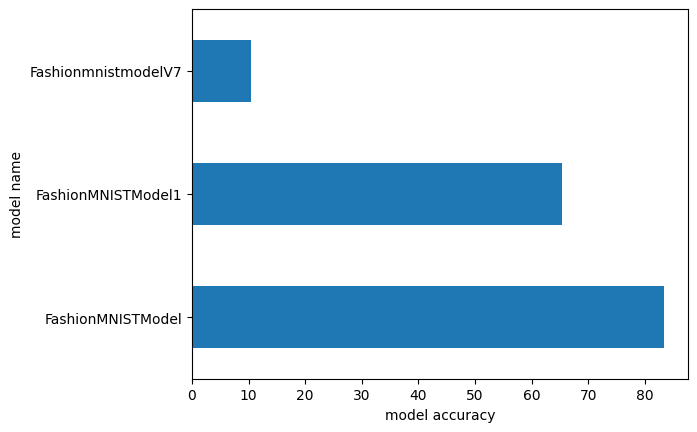

In [67]:
# visualize model results

compareResults.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("model accuracy")
plt.ylabel("model name")


In [68]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [69]:
img, label =test_data[0]

img.shape, label

(torch.Size([1, 28, 28]), 9)

In [70]:
import random
random.seed(42)

test_samples =[]
test_labels =[]

for sample, label in random.sample(list(test_dataloader), k=9):
  test_samples.append(sample)
  test_labels.append(label)

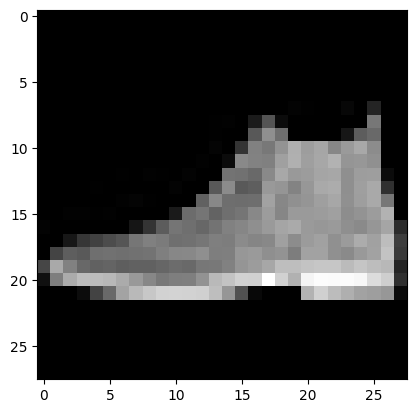

In [71]:
plt.imshow(img[0].squeeze(), cmap="gray")

In [72]:
test_labels

[tensor([5, 5, 3, 7, 5, 5, 4, 0, 7, 3, 3, 2, 0, 2, 9, 9, 0, 3, 0, 8, 3, 8, 8, 4,
         4, 1, 8, 2, 3, 5, 0, 4]),
 tensor([5, 8, 1, 6, 2, 6, 6, 4, 9, 5, 2, 0, 4, 6, 1, 2, 0, 9, 7, 0, 4, 4, 6, 6,
         2, 1, 0, 6, 7, 2, 9, 4]),
 tensor([1, 4, 1, 1, 4, 8, 3, 9, 5, 4, 4, 3, 7, 7, 7, 2, 3, 9, 1, 9, 4, 4, 0, 7,
         6, 6, 7, 9, 0, 6, 4, 9]),
 tensor([0, 0, 9, 8, 5, 3, 0, 7, 1, 9, 7, 8, 4, 0, 9, 9, 1, 2, 0, 6, 2, 2, 5, 1,
         0, 4, 8, 3, 4, 8, 3, 4]),
 tensor([2, 4, 1, 9, 7, 8, 1, 3, 9, 3, 6, 7, 8, 6, 5, 6, 7, 9, 9, 7, 0, 6, 2, 3,
         4, 2, 9, 5, 3, 9, 2, 8]),
 tensor([2, 4, 8, 3, 8, 0, 2, 0, 0, 4, 8, 5, 4, 9, 0, 9, 5, 8, 6, 9, 1, 2, 7, 2,
         1, 6, 6, 0, 6, 5, 0, 4]),
 tensor([1, 3, 5, 4, 5, 0, 4, 4, 1, 4, 4, 8, 4, 5, 9, 4, 1, 1, 7, 2, 3, 5, 0, 3,
         9, 7, 5, 3, 8, 8, 8, 9]),
 tensor([3, 4, 3, 3, 9, 4, 7, 7, 8, 1, 1, 6, 6, 5, 7, 9, 4, 7, 6, 7, 0, 0, 2, 9,
         9, 7, 7, 5, 0, 1, 4, 3]),
 tensor([4, 7, 9, 5, 0, 7, 9, 5, 1, 2, 9, 5, 5, 3, 9, 9, 1, 2, 7, 8, 0, 

In [75]:
# make predictions
pred_probs = make_predictions(model=model_1,
                              data=test_samples)

pred_probs

In [75]:
# plot predictions
plt.figure(figsize=(9,9))

for i, pred_prob in enumerate(pred_probs):
  plt.subplot(3,3,i+1)
  plt.imshow(test_samples[i].squeeze(), cmap="gray")

  pred_label =class_names[[pred_classes[i]]]

  truth_label =class_names[test_labels[i]]

  title_text = f"pred: {pred_label} | truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, color="green")
  else:
    plt.title(title_text, fontsize=10, color="red")
    plt.axis(False)


In [77]:
import mlxtend

# make predictions
y_pred =[]
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader):
    sample = torch.unsqueeze(sample, dim=0)
    pred_logit = model_2(sample)
    pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

y_pred_tensor = torch.stack(pred_probs)



In [79]:
# save a model and load

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save
MODEL_NAME ="pytorchcomputervision_model3.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorchcomputervision_model3.pt


In [82]:
#$ loading the model which is saved

torch.manual_seed(42)

loaded_model = FashionmnistmodelV7(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

#load in save state_dict()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

In [83]:
# check the model results are close to each other

torch.isclose(torch.tensor(model_2.state_dict()["model_loss"]),
              torch.tensor(loaded_model.state_dict()["model_loss"]),
              )